In [32]:
%matplotlib inline
import numpy as np
from numpy import random
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import chi2
import pandas as pd
import seaborn as sns

## A Little Statistics

# Problem 1

# The Normal Distribution is described by:
$$ h(x) = p(x \mid \mu,\sigma) = N(x|\mu,\sigma) \equiv \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$
or probability of x given $(\mu, \sigma)$

A normal distribution is a standard bell curve where it is centered at $\mu$ its width is proportional to the $\sigma$ parameter.

In [2]:
mu=178.4
sigma=5

In [3]:
def my_gauss():
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
    gauss = norm(mu, sigma).pdf(x)  # this is a function of x: gauss(x)
    # actual plotting
    fig, ax = plt.subplots(figsize=(5, 3.75))
    ax.axvline(mu, c='blue')
    ax.errorbar(mu, gauss.max() / 2., xerr=np.sqrt(2.*np.log(2.))*sigma, c='blue', capsize=4)
    plt.plot(x, gauss, ls='-', c='black', label=r'$\mu=%.1f,\ \sigma=%.1f$' % (mu, sigma))
    plt.ylim(0, gauss.max()*1.2)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\mu,\sigma)$')
    plt.title('Gaussian Distribution')
    plt.legend()
    plt.show()

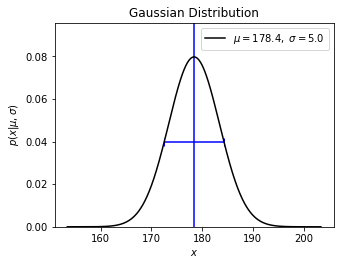

In [4]:
my_gauss()

In [5]:
gaussCDF = norm(mu, sigma).cdf

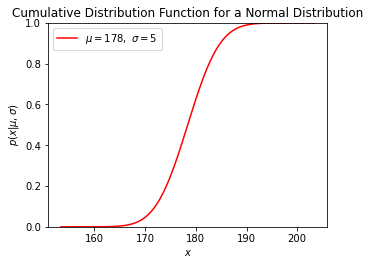

In [6]:
def gauss_cdf():
    fig, ax = plt.subplots(figsize=(5, 3.75))
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
    y = gaussCDF(x)
    plt.plot(x, y, ls='-', c='red', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
    plt.ylim(0, 1)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\mu,\sigma)$')
    plt.title('Cumulative Distribution Function for a Normal Distribution')
    plt.legend()
    plt.show()
gauss_cdf()

In [7]:
#Part B, CDF Test
sigma_test1 = stats.norm.cdf(1.8)
print(sigma_test1)

sigma_test2 = stats.norm.cdf(1.3)
print(sigma_test2)

0.9640696808870742
0.9031995154143897


Values match the z-table from wikipedia

In [8]:
#Part C, PPF Test
prob_test1 = stats.norm.ppf(1-sigma_test1)
print(prob_test1)

prob_test2 = stats.norm.ppf(1-sigma_test2)
print(prob_test2)

-1.8000000000000003
-1.3000000000000003


Got the desired sigma values

# Problem 2

## Chi-squared distribution

Chi-squared  is used primarily in hypothesis testing, and to a lesser extent for confidence intervals for population variance when the underlying distribution is normal. 
Mathematically it is expressed as $$\chi^2 \equiv \sum_{i=1}^N \left({x_i-\mu \over \sigma_i}\right)^2,$$
Chi-squared is useful for testing the accuracy of the fit when analyzing data.

In [38]:
chix=random.chisquare(df=1,size=100000)
df=1

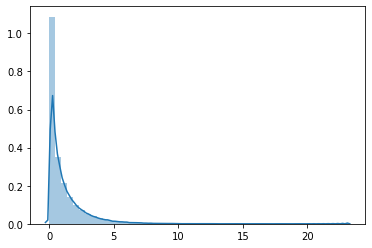

In [39]:
sns.distplot(chix)  
plt.show()

In [41]:
sigma_test3 = 1-stats.chi2.cdf(2, df=1)
print(sigma_test3)

sigma_test4 = 1-stats.chi2.cdf(2.5, df=1)
print(sigma_test4)

0.15729920705028488
0.11384629800665769


In [42]:
prob_test3 = stats.norm.ppf(sigma_test3)
print(prob_test3)

prob_test4 = stats.norm.ppf(sigma_test4)
print(prob_test4)

-1.0056199694085208
-1.2063239772954635


The results from above show one would need to go a very far distance to get to their respective probabilities.

For problem 4 I will choose an entirely random large number and run the previous tests.

In [43]:
sigma_test = 1-stats.chi2.cdf(25, df=1)
print(sigma_test)

5.733031437360481e-07


In [44]:
prob_test = stats.norm.ppf(sigma_test)
print(prob_test)

#Seems that when given sigma is small the probability becomes infinite.

-4.864648093137376


## Non-Continuous Distributions

## Poisson Distribution

The Poisson distribution expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event.

$$ P(k \mid \lambda) = e^{-\lambda}\frac{\lambda^k}{k!} $$
where $k$ is the number of events and $\lambda$ is the mean number of events.

In [58]:
data_poisson1 = poisson.rvs(mu=3, size=100000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

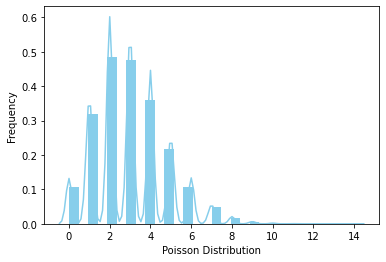

In [46]:
ax = sns.distplot(data_poisson1,
                  bins=30,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

In [47]:
data_poisson2 = poisson.rvs(mu=5, size=1000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

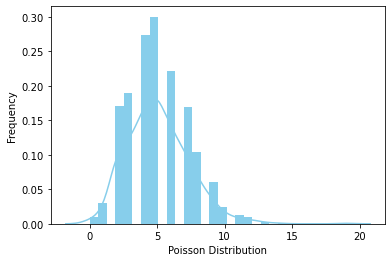

In [48]:
ax = sns.distplot(data_poisson2,
                  bins=30,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

In [49]:
data_poisson3 = poisson.rvs(mu=3, size=100)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

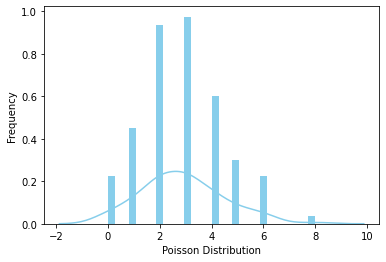

In [50]:
ax = sns.distplot(data_poisson3,
                  bins=30,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

Statistical question: What is the likelihood that I will be in (blank) location?

In [64]:
#Test run for the third Poisson graph
sigma_test5 = stats.poisson.cdf(4, mu=3,loc = 0)
print(sigma_test5)

0.8152632445237722


In [63]:
prob_test5 = stats.norm.ppf(sigma_test5, mu)
print(prob_test5)

179.29745999538912


Since the probability attained is very low it makes sense that sigma would then have to be very large as seen above.